In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
data = pd.read_csv( 'adult.csv' )
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
print(data.shape)
print(data['income'].unique())

(48842, 15)
['<=50K' '>50K']


In [15]:
selected_columns = data[ ['education', 'capital-gain', 'capital-loss'] ]
X = pd.get_dummies(data, columns = ['marital-status', 'relationship', 'gender', 'workclass', 'education', 'occupation', 'race', 'native-country', 'capital-gain', 'capital-loss'])

In [16]:
del X['fnlwgt']

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [25]:
target = data['income']
le = LabelEncoder()
le.fit( target )
Y = pd.Series( le.transform( data['income'] ) )
Y.head()


0    0
1    0
2    1
3    1
4    0
dtype: int64

In [26]:
del X['income']

KeyError: 'income'

In [27]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 0)

In [29]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
for i, C in enumerate((100, 1, 0.1, 0.001)):    
    print('C = {}'.format(C))
    
    model_l1 = LogisticRegression(C=C, penalty='l1')
    model_l2 = LogisticRegression(C=C, penalty='l2')
    
    model_l1.fit(X_train, Y_train)
    model_l2.fit(X_train, Y_train)
    
    print( 'score with L1 penalty: {:.1%} vs {:.1%}'.format(model_l1.score(X_test, Y_test), model_l1.score(X_train, Y_train)) )
    print( 'difference: {:.1%}\n'.format(model_l1.score(X_test, Y_test) - model_l1.score(X_train, Y_train)) )
    
    print( 'score with L2 penalty: {:.1%} vs {:.1%}'.format(model_l2.score(X_test, Y_test), model_l2.score(X_train, Y_train)) )
    print( 'difference: {:.1%}\n'.format(model_l2.score(X_test, Y_test) - model_l2.score(X_train, Y_train)) )

C = 100
score with L1 penalty: 86.8% vs 87.4%
difference: -0.6%

score with L2 penalty: 86.8% vs 87.4%
difference: -0.6%

C = 1
score with L1 penalty: 86.5% vs 87.0%
difference: -0.6%

score with L2 penalty: 86.2% vs 87.0%
difference: -0.8%

C = 0.1
score with L1 penalty: 84.4% vs 85.0%
difference: -0.7%

score with L2 penalty: 85.0% vs 85.6%
difference: -0.6%

C = 0.001
score with L1 penalty: 75.9% vs 76.8%
difference: -0.9%

score with L2 penalty: 78.7% vs 79.6%
difference: -0.9%



In [31]:
model_l1 = LogisticRegression(C=100, penalty='l1')
model_l1.fit(X_train, Y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
predictions = model_l1.predict_proba( X_test)

In [35]:
model_l1.score(X_test, Y_test)

0.8680452474791421

# Задание к занятию «Проверка точности модели, переобучение, регуляризация»

In [214]:
from sklearn.metrics import roc_auc_score

In [237]:
roc_auc_score( Y_test, predictions[:, 1] )

0.9222444277592519

In [239]:
from sklearn.metrics import auc

In [36]:
from sklearn.metrics import roc_curve

In [37]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

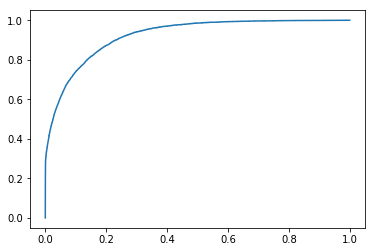

In [38]:
plt.plot( fpr, tpr );